In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime 
from datetime import date 
import seaborn as sn
train=pd.read_csv(r"C:\Users\pranav\Downloads\Assignment 4 (3)\train.csv")

In [5]:
test=pd.read_csv(r"C:\Users\pranav\Downloads\Assignment 4 (3)\test.csv")

In [6]:
train.shape


(12980, 12)

In [7]:
test.shape

(4399, 11)

In [8]:
test.head()


datetime  season  holiday  workingday  weather   temp   atemp  \
0  2012-06-30 1:00:00       3        0           0        3  26.24  28.790   
1  2012-06-30 2:00:00       3        0           0        2  26.24  28.790   
2  2012-06-30 3:00:00       3        0           0        2  26.24  28.790   
3  2012-06-30 4:00:00       3        0           0        2  25.42  27.275   
4  2012-06-30 5:00:00       3        0           0        1  26.24  28.790   

   humidity  windspeed  casual  registered  
0      89.0    15.0013       3          55  
1      89.0     0.0000       7          54  
2      89.0     0.0000       3          20  
3      94.0     0.0000       3          15  
4      89.0    11.0014       3           7

In [9]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 0:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 1:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 2:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 3:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 4:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0      81.0        0.0       3          13     16  
1      80.0        0.0       8          32     40  
2      80.0        0.0       5          27     32  
3      75.0        0.0       3          10     13  
4      75.0        0.0       0           1      1

In [10]:
train.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [11]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [12]:
train.dtypes


datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

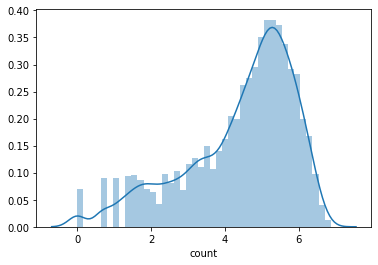

In [16]:
sn.distplot(np.log(train["count"]))

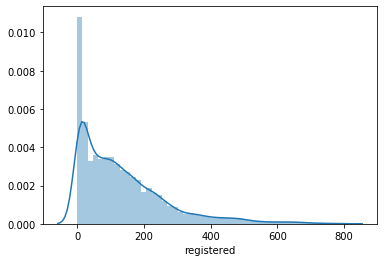

In [18]:
sn.distplot(train["registered"])

In [19]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()

In [20]:
mask = np.array(corr)

In [21]:
mask[np.tril_indices_from(mask)] = False

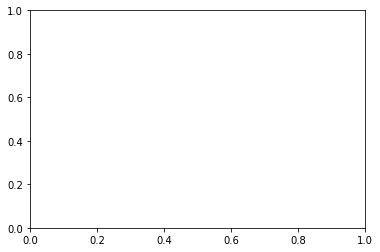

In [22]:
fig,ax= plt.subplots()

In [23]:
fig.set_size_inches(20,10)

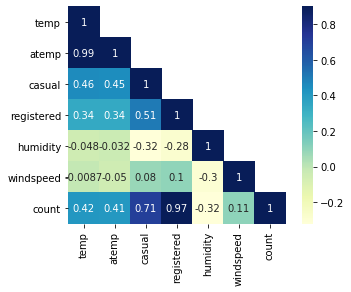

In [24]:
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [25]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [26]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [28]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
   

In [29]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
   

In [30]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [31]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)


In [32]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()
X_train = training.drop('count', 1)
y_train = np.log(training['count'])
X_val = validation.drop('count', 1)
y_val = np.log(validation['count'])

In [33]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [34]:
lModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
prediction = lModel.predict(X_val)

In [36]:
def rmsle(y, y_):
    
    y = np.exp(y)   # taking the exponential as we took the log of target variable\n",
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [37]:
rmsle(y_val,prediction)

0.8875379204281797

In [38]:
test_prediction = lModel.predict(test)

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dt_reg = DecisionTreeRegressor(max_depth=5)

In [41]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [42]:
predict = dt_reg.predict(X_val)

In [43]:
rmsle(y_val, predict)

0.17102267399447002

In [44]:
test_prediction = dt_reg.predict(test)

In [45]:
final_prediction = np.exp(test_prediction)

In [46]:
submission = pd.DataFrame()

In [47]:
submission['count'] = final_prediction

In [48]:
submission.to_csv('submission.csv', header=True, index=False)